In [1]:
#Importing all necessary library 
import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import statistics


# cyk1 RNAi: Data of Vx and Vy

In [2]:
def cyk1_x_y_edgetime_dataframe(df1,df2,time0):
    spots_source_id = df1.iloc[:,2]  
    spots_edge_time_=df1.iloc[:,8].tolist()
    spots_edge_time=[]

    spots_edge_time = pd.Series([int((h - time0) * 5) for h in spots_edge_time_])

        
    spots_target_id = df1.iloc[:,3]  #Target id from edges files
    # Search values from column '3' of df1 in df2 and find corresponding rows
    found_rows_source = []
    for value in spots_source_id:
        # Check if the value is present in df2 column '3'
        matching_rows_source = df2.index[df2.iloc[:, 1] == value].tolist()
        found_rows_source.extend(matching_rows_source)

    found_rows_target=[]
    for i in spots_target_id:
        matching_rows_target = df2.index[df2.iloc[:, 1] == i].tolist()
        found_rows_target.extend(matching_rows_target)

    # Extract values from columns 4 and 5 of df2 based on found row numbers
    source_x_values = df2.iloc[found_rows_source, 4]  # Assuming column index 3 is '4'
    source_y_values = df2.iloc[found_rows_source, 5]  # Assuming column index 4 is '5'

    target_x_values = df2.iloc[found_rows_target, 4]  # Assuming column index 3 is '4'
    target_y_values = df2.iloc[found_rows_target, 5]  # Assuming column index 4 is '5'
    


    # Create a new DataFrame with column 3 values, column 4 values, and column 5 values
    result_df = pd.DataFrame({
        'spots source id': spots_source_id.values,
        'spots target id': spots_target_id.values,
        'source x': source_x_values.values,
        'target x':target_x_values.values,
        'source y': source_y_values.values,
        'target y': target_y_values.values,
        'Edge time':spots_edge_time.values
    })

    sorted_result_df= result_df.sort_values(by='Edge time', ascending=True)
    
#  INCLUDE THE VELICITY IN X AND Y COLUMNS of SORTED DATAFRAME
    Vx=[]
    for j in range(len(sorted_result_df)):
        k=abs(sorted_result_df.iloc[j,2]-sorted_result_df.iloc[j,3])/5
        Vx.append(k)
    Vy=[]
    for l in range(len(sorted_result_df)):
        k_=abs(sorted_result_df.iloc[l,4]-sorted_result_df.iloc[l,5])/5
        Vy.append(k_)

    sorted_result_df['Velocity_in_x'] = Vx
    sorted_result_df['Velocity_in_y']= Vy
    
    result_dict={'Time':sorted_result_df['Edge time'],'vx':sorted_result_df['Velocity_in_x'],'Vy':sorted_result_df['Velocity_in_y']}
    Final_dataframe_cyk1=pd.DataFrame(result_dict)
    
    print(Final_dataframe_cyk1)
    return Final_dataframe_cyk1


In [5]:
# Reading all the edge and spot files generated from TrackMate (cyk-1 RNAi embryos)

df01_edges=pd.read_csv('edges_17_02_24_cyk1_4959_LD_4um.csv',delimiter=',',skiprows=3)
df02_edges=pd.read_csv('edges_17_02_24_cyk1_4960_LD_4um.csv',delimiter=',',skiprows=3)
df03_edges=pd.read_csv('edges_17_02_24_cyk1_4961_LD_4um.csv',delimiter=',',skiprows=3)
df04_edges=pd.read_csv('edges_17_02_24_cyk1_4962_LD_4um.csv',delimiter=',',skiprows=3)
df05_edges=pd.read_csv('edges_17_02_24_cyk1_4963_LD_4um.csv',delimiter=',',skiprows=3)
df06_edges=pd.read_csv('edges_17_02_24_cyk1_4966_left_LD_4um.csv',delimiter=',',skiprows=3)
df07_edges=pd.read_csv('edges_17_02_24_cyk1_4966_right_LD_4um.csv',delimiter=',',skiprows=3)
df08_edges=pd.read_csv('edges_cyk1_4574_frame_0_103_LD4um.csv',delimiter=',',skiprows=3)
df09_edges=pd.read_csv('edges_cyk1_4577_frame_0_334_LD4um.csv',delimiter=',',skiprows=3)
df10_edges=pd.read_csv('edges_cyk1_4578_frame_0_130_LD4um.csv',delimiter=',',skiprows=3)
df11_edges=pd.read_csv('edges_cyk1_4582_lower_frame_0_150_LD4um.csv',delimiter=',',skiprows=3)
df12_edges=pd.read_csv('edges_cyk1_4584_upper_frame0_all_Ld4um.csv',delimiter=',',skiprows=3)
df13_edges=pd.read_csv('edges_cyk1_4586_lower_frame0_all_Ld4um.csv',delimiter=',',skiprows=3)
df14_edges=pd.read_csv('edges_cyk1_4586_upper_frame0_all_Ld4um.csv',delimiter=',',skiprows=3)


df01_spots=pd.read_csv('spots_17_02_24_cyk1_4959_LD_4um.csv',delimiter=',',skiprows=3)#1st column is spots id and4,5 are x,y resp.
df02_spots=pd.read_csv('spots_17_02_24_cyk1_4960_LD_4um.csv',delimiter=',',skiprows=3)#1st column is spots id and4,5 are x,y resp.
df03_spots=pd.read_csv('spots_17_02_24_cyk1_4961_LD_4um.csv',delimiter=',',skiprows=3)#1st column is spots id and4,5 are x,y resp.
df04_spots=pd.read_csv('spots_17_02_24_cyk1_4962_LD_4um.csv',delimiter=',',skiprows=3)#1st column is spots id and4,5 are x,y resp.
df05_spots=pd.read_csv('spot_17_02_24_cyk1_4963_LD_4um.csv',delimiter=',',skiprows=3)#1st column is spots id and4,5 are x,y resp.
df06_spots=pd.read_csv('spots_17_02_24_cyk1_4966_left_LD_4um.csv',delimiter=',',skiprows=3)#1st column is spots id and4,5 are x,y resp.
df07_spots=pd.read_csv('spots_17_02_24_cyk1_4966_right_LD_4um.csv',delimiter=',',skiprows=3)
df08_spots=pd.read_csv('spots_cyk1_4574_frame_0_103_LD4um.csv',delimiter=',',skiprows=3)
df09_spots=pd.read_csv('spots_cyk1_4577_frame_0_334_LD4um.csv',delimiter=',',skiprows=3)
df10_spots=pd.read_csv('spots_cyk1_4578_frame_0_130_LD4um.csv',delimiter=',',skiprows=3)
df11_spots=pd.read_csv('spots_cyk1_4582_lower_frame_0_150_LD4um.csv',delimiter=',',skiprows=3)
df12_spots=pd.read_csv('spots_cyk1_4584_upper_frame0_all_Ld4um.csv',delimiter=',',skiprows=3)
df13_spots=pd.read_csv('spots_cyk1_4586_lower_frame0_all_Ld4um.csv',delimiter=',',skiprows=3)
df14_spots=pd.read_csv('spots_cyk1_4586_upper_frame0_all_Ld4um.csv',delimiter=',',skiprows=3)

# Here, the time0 for cyk-1 RNAi embryos are the frame at which furrow initiation begins:
# For embryos [cyk1_01,cyk1_02,cyk1_03,cyk1_04,cyk1_05,cyk1_06,cyk1_07,cyk1_08,cyk1_09,cyk1_10,cyk1_11,cyk1_12,cyk1_13,cyk1_14]
# the time0 are [2,2,42,30,2,42,67,7,40,19,53,45,16,65]

cyk1_01=cyk1_x_y_edgetime_dataframe(df01_edges,df01_spots,2)
cyk1_02=cyk1_x_y_edgetime_dataframe(df02_edges,df02_spots,2)
cyk1_03=cyk1_x_y_edgetime_dataframe(df03_edges,df03_spots,42)
cyk1_04=cyk1_x_y_edgetime_dataframe(df04_edges,df04_spots,30)
cyk1_05=cyk1_x_y_edgetime_dataframe(df05_edges,df05_spots,2)
cyk1_06=cyk1_x_y_edgetime_dataframe(df06_edges,df06_spots,42)
cyk1_07=cyk1_x_y_edgetime_dataframe(df07_edges,df07_spots,67)
cyk1_08=cyk1_x_y_edgetime_dataframe(df08_edges,df08_spots,7)
cyk1_09=cyk1_x_y_edgetime_dataframe(df09_edges,df09_spots,40)
cyk1_10=cyk1_x_y_edgetime_dataframe(df10_edges,df10_spots,19)
cyk1_11=cyk1_x_y_edgetime_dataframe(df11_edges,df11_spots,53)
cyk1_12=cyk1_x_y_edgetime_dataframe(df12_edges,df12_spots,45)
cyk1_13=cyk1_x_y_edgetime_dataframe(df13_edges,df13_spots,16)
cyk1_14=cyk1_x_y_edgetime_dataframe(df14_edges,df14_spots,65)



      Time        vx        Vy
29      -7  0.033304  0.037200
103     -7  0.181420  0.316203
80      -7  0.341754  0.032407
26      -7  0.152796  0.065323
4       -7  0.080308  0.121444
...    ...       ...       ...
1016   447  0.028393  0.090126
1255   447  0.001869  0.055884
1579   447  0.013548  0.071124
1596   447  0.070694  0.029751
1565   447  0.009615  0.095036

[1611 rows x 3 columns]
      Time        vx        Vy
150     -7  0.111174  0.206233
48      -7  0.008352  0.004832
59      -7  0.121501  0.232811
24      -7  0.046687  0.014735
23      -7  0.023875  0.207787
...    ...       ...       ...
1723   472  0.012829  0.014782
1697   472  0.020896  0.050820
1760   472  0.062903  0.008926
1761   472  0.013902  0.158540
1737   472  0.008743  0.006579

[1766 rows x 3 columns]
      Time        vx        Vy
20    -207  0.017855  0.029585
2     -207  0.025167  0.049082
28    -207  0.012782  0.031896
52    -207  0.053816  0.007213
7     -207  0.040342  0.024157
...    ...       ...

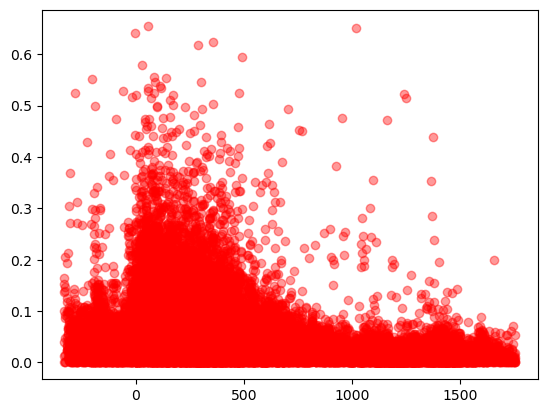

In [6]:
plt.scatter(cyk1_01.iloc[:,0],cyk1_01.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_02.iloc[:,0],cyk1_02.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_03.iloc[:,0],cyk1_03.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_04.iloc[:,0],cyk1_04.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_05.iloc[:,0],cyk1_05.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_06.iloc[:,0],cyk1_06.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_07.iloc[:,0],cyk1_07.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_08.iloc[:,0],cyk1_08.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_09.iloc[:,0],cyk1_09.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_10.iloc[:,0],cyk1_10.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_11.iloc[:,0],cyk1_11.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_12.iloc[:,0],cyk1_12.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_13.iloc[:,0],cyk1_13.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)
plt.scatter(cyk1_14.iloc[:,0],cyk1_14.iloc[:,1],label='Vx cyk1',color='r',alpha=0.4)

# Control: Data of Vx and Vy

In [7]:
def L4440_x_y_edgetime_dataframe(df1,df2,time0):
    spots_source_id = df1.iloc[:,2]  # Assuming column index 2 is '3' (Python uses 0-based indexing)
    spots_edge_time_=df1.iloc[:,8].tolist()
    spots_edge_time=[]
#1st column is spots id and4,5 are x,y coordinates resp.

#     convert time in seconds and also align with time 0
    spots_edge_time = pd.Series([int((h - time0) * 5) for h in spots_edge_time_])

        
    spots_target_id = df1.iloc[:,3]  #Target id from edges files
    # Search values from column '3' of df1 in df2 and find corresponding rows
    found_rows_source = []
    for value in spots_source_id:
        # Check if the value is present in df2 column '3'
        matching_rows_source = df2.index[df2.iloc[:, 1] == value].tolist()
        found_rows_source.extend(matching_rows_source)

    found_rows_target=[]
    for i in spots_target_id:
        matching_rows_target = df2.index[df2.iloc[:, 1] == i].tolist()
        found_rows_target.extend(matching_rows_target)

    # Extract values from columns 4 and 5 of df2 based on found row numbers
    source_x_values = df2.iloc[found_rows_source, 4]  
    source_y_values = df2.iloc[found_rows_source, 5]  

    target_x_values = df2.iloc[found_rows_target, 4]  
    target_y_values = df2.iloc[found_rows_target, 5]  


    # Create a new DataFrame with column 3 values, column 4 values, and column 5 values
    result_df = pd.DataFrame({
        'spots source id': spots_source_id.values,
        'spots target id': spots_target_id.values,
        'source x': source_x_values.values,
        'target x':target_x_values.values,
        'source y': source_y_values.values,
        'target y': target_y_values.values,
        'Edge time':spots_edge_time.values
    })

    sorted_result_df= result_df.sort_values(by='Edge time', ascending=True)
    
#  INCLUDE THE VELICITY IN X AND Y COLUMNS IN SORTED DATAFRAME
    Vx=[]
    for j in range(len(sorted_result_df)):
        k=abs(sorted_result_df.iloc[j,2]-sorted_result_df.iloc[j,3])/5
        Vx.append(k)
    Vy=[]
    for l in range(len(sorted_result_df)):
        k_=abs(sorted_result_df.iloc[l,4]-sorted_result_df.iloc[l,5])/5
        Vy.append(k_)

    sorted_result_df['Velocity_in_x'] = Vx
    sorted_result_df['Velocity_in_y']= Vy
    
    result_dict={'Time':sorted_result_df['Edge time'],'vx':sorted_result_df['Velocity_in_x'],'Vy':sorted_result_df['Velocity_in_y']}
    Final_dataframe_L4440=pd.DataFrame(result_dict)
    print(Final_dataframe_L4440)
    
    return Final_dataframe_L4440


In [8]:
df01_edges=pd.read_csv('edges_17_02_24_L4440_4957_LD4um.csv',delimiter=',',skiprows=3)
df02_edges=pd.read_csv('edges_17_02_24_L4440_4970_LD4um.csv',delimiter=',',skiprows=3)
df03_edges=pd.read_csv('edges_17_02_24_L4440_4971_LD4um.csv',delimiter=',',skiprows=3)
df04_edges=pd.read_csv('edges_17_02_24_L4440_4985_LD4um.csv',delimiter=',',skiprows=3)
df05_edges=pd.read_csv('edges_17_02_24_L4440_4992_LD4um.csv',delimiter=',',skiprows=3)
df06_edges=pd.read_csv('edges_17_02_24_L4440_4994_LD4um.csv',delimiter=',',skiprows=3)
df07_edges=pd.read_csv('edges_17_02_24_L4440_4995_LD4um.csv',delimiter=',',skiprows=3)
df08_edges=pd.read_csv('edges_17_02_24_L4440_4997_LD4um.csv',delimiter=',',skiprows=3)
df09_edges=pd.read_csv('edges_17_02_24_L4440_5001_LD4um.csv',delimiter=',',skiprows=3)
df10_edges=pd.read_csv('edges_17_02_24_L4440_5003_LD4um.csv',delimiter=',',skiprows=3)
df11_edges=pd.read_csv('edges_L4440_4575_frame_0_280_LD4um.csv',delimiter=',',skiprows=3)
df12_edges=pd.read_csv('edges_L4440_4576_frame_0_89_LD4um.csv',delimiter=',',skiprows=3)
df13_edges=pd.read_csv('edges_L4440_4587_frame_0_120_LD4um.csv',delimiter=',',skiprows=3)
df14_edges=pd.read_csv('edges_L4440_4589_frame_0_91_LD4um.csv',delimiter=',',skiprows=3)
df15_edges=pd.read_csv('edges_L4440_4590_frame_0_80_LD4um.csv',delimiter=',',skiprows=3)


df01_spots=pd.read_csv('spots_17_02_24_L4440_4957_LD4um.csv',delimiter=',',skiprows=3)
df02_spots=pd.read_csv('spots_17_02_24_L4440_4970_LD4um.csv',delimiter=',',skiprows=3)
df03_spots=pd.read_csv('spots_17_02_24_L4440_4971_LD4um.csv',delimiter=',',skiprows=3)
df04_spots=pd.read_csv('spots_17_02_24_L4440_4985_LD4um.csv',delimiter=',',skiprows=3)
df05_spots=pd.read_csv('spots_17_02_24_L4440_4992_LD4um.csv',delimiter=',',skiprows=3)
df06_spots=pd.read_csv('spots_17_02_24_L4440_4994_LD4um.csv',delimiter=',',skiprows=3)
df07_spots=pd.read_csv('spots_17_02_24_L4440_4995_LD4um.csv',delimiter=',',skiprows=3)
df08_spots=pd.read_csv('spots_17_02_24_L4440_4997_LD4um.csv',delimiter=',',skiprows=3)
df09_spots=pd.read_csv('spots_17_02_24_L4440_5001_LD4um.csv',delimiter=',',skiprows=3)
df10_spots=pd.read_csv('spots_17_02_24_L4440_5003_LD4um.csv',delimiter=',',skiprows=3)
df11_spots=pd.read_csv('spots_L4440_4575_frame_0_280_LD4um.csv',delimiter=',',skiprows=3)
df12_spots=pd.read_csv('spots_L4440_4576_frame_0_89_LD4um.csv',delimiter=',',skiprows=3)
df13_spots=pd.read_csv('spots_L4440_4587_frame_0_120_LD4um.csv',delimiter=',',skiprows=3)
df14_spots=pd.read_csv('spots_L4440_4589_frame_0_91_LD4um.csv',delimiter=',',skiprows=3)
df15_spots=pd.read_csv('spots_L4440_4590_frame_0_80_LD4um.csv',delimiter=',',skiprows=3)


L4440_01=L4440_x_y_edgetime_dataframe(df01_edges,df01_spots,43)
L4440_02=L4440_x_y_edgetime_dataframe(df02_edges,df02_spots,14)
L4440_03=L4440_x_y_edgetime_dataframe(df03_edges,df03_spots,48)
L4440_04=L4440_x_y_edgetime_dataframe(df04_edges,df04_spots,2)
L4440_05=L4440_x_y_edgetime_dataframe(df05_edges,df05_spots,33)
L4440_06=L4440_x_y_edgetime_dataframe(df06_edges,df06_spots,24)
L4440_07=L4440_x_y_edgetime_dataframe(df07_edges,df07_spots,13)
L4440_08=L4440_x_y_edgetime_dataframe(df08_edges,df08_spots,30)
L4440_09=L4440_x_y_edgetime_dataframe(df09_edges,df09_spots,17)
L4440_10=L4440_x_y_edgetime_dataframe(df10_edges,df10_spots,11)
L4440_11=L4440_x_y_edgetime_dataframe(df11_edges,df11_spots,31)
L4440_12=L4440_x_y_edgetime_dataframe(df12_edges,df12_spots,40)
L4440_13=L4440_x_y_edgetime_dataframe(df13_edges,df13_spots,44)
L4440_14=L4440_x_y_edgetime_dataframe(df14_edges,df14_spots,23)
L4440_15=L4440_x_y_edgetime_dataframe(df15_edges,df15_spots,6)



     Time        vx        Vy
7    -202  0.012627  0.050867
6    -197  0.040235  0.017685
8    -192  0.030653  0.011664
10   -177  0.071696  0.008722
9    -172  0.031931  0.014687
..    ...       ...       ...
658  1122  0.017845  0.064490
618  1122  0.008067  0.078302
615  1127  0.030970  0.065757
625  1132  0.065387  0.048158
661  1132  0.005150  0.088982

[663 rows x 3 columns]
     Time        vx        Vy
187   -67  0.005671  0.032218
206   -67  0.001021  0.011433
199   -67  0.023659  0.024030
163   -67  0.017602  0.014423
87    -67  0.044748  0.057777
..    ...       ...       ...
941   917  0.080292  0.129398
958   917  0.024099  0.083398
937   917  0.046679  0.154976
952   917  0.040601  0.142281
932   917  0.032880  0.135759

[963 rows x 3 columns]
      Time        vx        Vy
4     -237  0.021142  0.006055
79    -237  0.006691  0.051735
17    -237  0.053374  0.028403
113   -237  0.012933  0.034275
133   -232  0.034533  0.030205
...    ...       ...       ...
1294   892  0.0

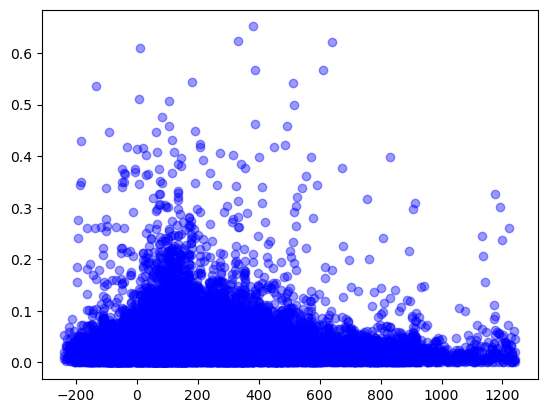

In [9]:
plt.scatter(L4440_01.iloc[:,0],L4440_01.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_02.iloc[:,0],L4440_02.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_03.iloc[:,0],L4440_03.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_04.iloc[:,0],L4440_04.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_05.iloc[:,0],L4440_05.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_06.iloc[:,0],L4440_06.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_07.iloc[:,0],L4440_07.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_08.iloc[:,0],L4440_08.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_09.iloc[:,0],L4440_09.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_10.iloc[:,0],L4440_10.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_11.iloc[:,0],L4440_11.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_12.iloc[:,0],L4440_12.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_13.iloc[:,0],L4440_13.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_14.iloc[:,0],L4440_14.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)
plt.scatter(L4440_15.iloc[:,0],L4440_15.iloc[:,1],label='Vx L4440',color='b',alpha=0.4)

# Average Vx at each time point for control:

In [10]:
Time_All1=pd.concat([L4440_01.iloc[:,0],L4440_02.iloc[:,0],L4440_03.iloc[:,0],L4440_04.iloc[:,0],L4440_05.iloc[:,0],L4440_06.iloc[:,0],L4440_07.iloc[:,0],L4440_08.iloc[:,0],L4440_09.iloc[:,0],L4440_10.iloc[:,0],L4440_11.iloc[:,0],L4440_12.iloc[:,0],L4440_13.iloc[:,0],L4440_14.iloc[:,0],L4440_15.iloc[:,0]])
Time_All_=pd.unique(Time_All1)                   
Time_All=np.sort(Time_All_)                     

In [11]:
Final_Vx_L4440=[]
for i in range(len(Time_All)):
    Final_Vx_L4440.append([])
     
datasets_= [L4440_01,L4440_02,L4440_03,L4440_04,L4440_05,L4440_06,L4440_07,L4440_08,L4440_09,L4440_10,L4440_11,L4440_12,L4440_13,L4440_14,L4440_15]

count=0
for i in Time_All:
    for j in datasets_:
#         print(count)
        for k in range(len(j.iloc[:,0])):
            if j.iloc[k,0]==i:
#                 print(count)
                Final_Vx_L4440[count].append(j.iloc[k,1])
    count+=1
# print(Final_Vx_L4440)    

In [12]:
Final_avg_Vx_L4440=[]
Final_std_dev_Vx_L4440=[]
for i in range(len(Time_All)):
    Final_avg_Vx_L4440.append(np.mean(Final_Vx_L4440[i]))
    Final_std_dev_Vx_L4440.append(np.std(Final_Vx_L4440[i]))
print(Final_avg_Vx_L4440) 
error_Pos=[]
error_neg=[]
for l in range(len(Final_avg_Vx_L4440)):
    error_Pos.append(Final_avg_Vx_L4440[l]+Final_std_dev_Vx_L4440[l])
    error_neg.append(Final_avg_Vx_L4440[l]-Final_std_dev_Vx_L4440[l])


[0.023535115530674486, 0.018414703758159588, 0.023476886515435638, 0.03488902326741774, 0.019572857279698947, 0.02522586485528173, 0.018976678160480275, 0.01759273833726858, 0.036299855319896365, 0.04489127803326721, 0.03787267695536936, 0.07091996614647951, 0.02344541794351041, 0.016091668141234708, 0.015370715885339859, 0.04288473820079285, 0.021684496787832633, 0.02754142024412016, 0.02603856287835086, 0.03466497073023126, 0.026979373361795008, 0.04445783814680749, 0.027478877674402966, 0.02535769386723275, 0.035238359756960144, 0.04413128516103122, 0.04086010113574615, 0.041149847531764594, 0.030603974416160723, 0.02731502485864382, 0.023924356118316874, 0.028703580799028905, 0.025273405020345162, 0.019492329386116957, 0.028746123693825235, 0.024540422565586265, 0.023798573455490763, 0.028940700144540022, 0.04975337477978924, 0.042614702377118466, 0.033128320675428334, 0.038209537628762655, 0.02599254856754657, 0.03482141778946984, 0.04379690456136174, 0.04605961731370534, 0.042441

# Average Vx at each time point for cyk1 RNAi:

In [13]:
Time_All1=pd.concat([cyk1_01.iloc[:,0],cyk1_02.iloc[:,0],cyk1_03.iloc[:,0],cyk1_04.iloc[:,0],cyk1_05.iloc[:,0],cyk1_06.iloc[:,0],cyk1_07.iloc[:,0],cyk1_08.iloc[:,0],cyk1_09.iloc[:,0],cyk1_10.iloc[:,0],cyk1_11.iloc[:,0],cyk1_12.iloc[:,0],cyk1_13.iloc[:,0],cyk1_14.iloc[:,0]])
Time_All_=pd.unique(Time_All1)                   
Time_All_cyk1=np.sort(Time_All_)

In [14]:
Final_Vx_cyk1=[]
for i in range(len(Time_All_cyk1)):
    Final_Vx_cyk1.append([])
     
datasets_cyk1= [cyk1_01,cyk1_02,cyk1_03,cyk1_04,cyk1_05,cyk1_06,cyk1_07,cyk1_08,cyk1_09,cyk1_10,cyk1_11,cyk1_12,cyk1_13,cyk1_14]

count=0
for i in Time_All_cyk1:
    for j in datasets_cyk1:
#         print(count)
        for k in range(len(j.iloc[:,0])):
            if j.iloc[k,0]==i:
#                 print(count)
                Final_Vx_cyk1[count].append(j.iloc[k,1])
    count+=1
# print(Final_Vx_cyk1)    

In [15]:
Final_avg_Vx_cyk1=[]
Final_std_dev_Vx_cyk1=[]
for i in range(len(Time_All_cyk1)):
    Final_avg_Vx_cyk1.append(np.mean(Final_Vx_cyk1[i]))
    Final_std_dev_Vx_cyk1.append(np.std(Final_Vx_cyk1[i]))
error_Pos_cyk1=[]
error_neg_cyk1=[]
for l in range(len(Final_avg_Vx_cyk1)):
    error_Pos_cyk1.append(Final_avg_Vx_cyk1[l]+Final_std_dev_Vx_cyk1[l])
    error_neg_cyk1.append(Final_avg_Vx_cyk1[l]-Final_std_dev_Vx_cyk1[l])


# combined plot of Vx for control and cyk-1 RNAi 

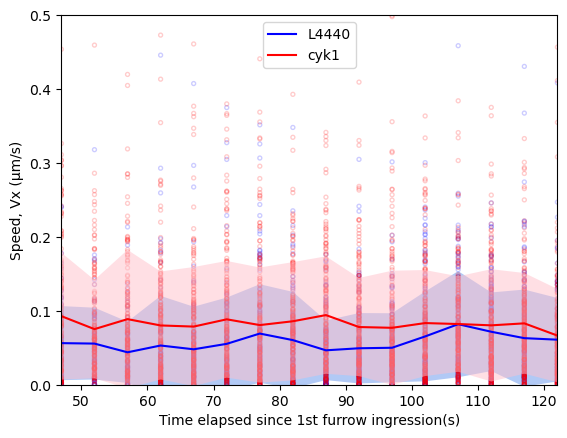

In [16]:
for i in range(len(Final_Vx_L4440)):
    plt.scatter([Time_All[i] for j in range(len(Final_Vx_L4440[i]))],Final_Vx_L4440[i],edgecolor='b',color='none',alpha=0.2,s=8)
plt.plot(Time_All,Final_avg_Vx_L4440,color='blue',label='L4440')

plt.fill_between(Time_All,error_Pos,error_neg,alpha=0.5, facecolor='cornflowerblue')

for m in range(len(Final_Vx_cyk1)):
    plt.scatter([Time_All_cyk1[m] for j in range(len(Final_Vx_cyk1[m]))],Final_Vx_cyk1[m],edgecolor='r',color='none',alpha=0.2,s=8)
plt.plot(Time_All_cyk1,Final_avg_Vx_cyk1,color='red',label='cyk1')

plt.fill_between(Time_All_cyk1,error_Pos_cyk1,error_neg_cyk1,alpha=0.5, facecolor='pink')
plt.xlim(47,122)
plt.xlabel('Time elapsed since 1st furrow ingression(s)')
plt.ylabel('Speed, Vx (\u03bcm/s)')
plt.ylim(0,0.5)
plt.legend()
plt.savefig('Vx_L4440_cyk1.jpg')

# Histogram of Vx from 47s t0 122s for control and cyk-1 RNAi:

In [17]:
# The 'Time_All' and 'Time_All_cyk1' are all the unique synchronized time in control and cyk-1 RNAi embryos resp.
print(Time_All)
print(Time_All_cyk1)

[-237 -232 -227 -222 -217 -212 -207 -202 -197 -192 -187 -182 -177 -172
 -167 -162 -157 -152 -147 -142 -137 -132 -127 -122 -117 -112 -107 -102
  -97  -92  -87  -82  -77  -72  -67  -62  -57  -52  -47  -42  -37  -32
  -27  -22  -17  -12   -7   -2    2    7   12   17   22   27   32   37
   42   47   52   57   62   67   72   77   82   87   92   97  102  107
  112  117  122  127  132  137  142  147  152  157  162  167  172  177
  182  187  192  197  202  207  212  217  222  227  232  237  242  247
  252  257  262  267  272  277  282  287  292  297  302  307  312  317
  322  327  332  337  342  347  352  357  362  367  372  377  382  387
  392  397  402  407  412  417  422  427  432  437  442  447  452  457
  462  467  472  477  482  487  492  497  502  507  512  517  522  527
  532  537  542  547  552  557  562  567  572  577  582  587  592  597
  602  607  612  617  622  627  632  637  642  647  652  657  662  667
  672  677  682  687  692  697  702  707  712  717  722  727  732  737
  742 

Final_Vx_L4440 and Final_Vx_cyk1 contains all velocity Vx values 

In [18]:
#First look for the edge time that exists and matches around the time window where we want to find

index_start_L4440 = np.where(Time_All == 47)[0][0]
index_end_L4440 = np.where(Time_All == 122)[0][0]

print('The start and end index for L4440 RNAi',index_start_L4440,index_end_L4440)

The start and end index for L4440 RNAi 57 72


In [19]:
index_start_cyk1 = np.where(Time_All_cyk1 == 47)[0][0]
index_end_cyk1 = np.where(Time_All_cyk1 == 122)[0][0]


print('The start and end index for cyk-1 RNAi',index_start_cyk1,index_end_cyk1)

The start and end index for cyk-1 RNAi 76 91


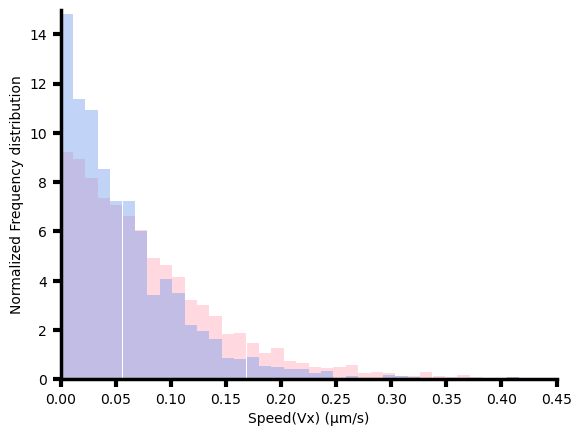

Mean Vx L4440: 0.05895743207930071    std. dev. L4440: 0.05836816110911668
Median Vx L4440: 0.04354791784704588
Mean Vx cyk1: 0.08193101839863075    std. dev. cyk1: 0.07552548532294188
Median Vx cyk1: 0.06257460590635304


In [20]:

Mean_cyk1_Vx_47_122s=[]
Mean_L4440_Vx_47_122s=[]

for i in range(index_start_cyk1,(index_end_cyk1+1),1):
    for j in range(len(Final_Vx_cyk1[i])):
        Mean_cyk1_Vx_47_122s.append(Final_Vx_cyk1[i][j])
        
for l in range(index_start_L4440,(index_end_L4440+1),1):        
    for k in range(len(Final_Vx_L4440[l])):
#         print(k)
        Mean_L4440_Vx_47_122s.append(Final_Vx_L4440[l][k])

plt.hist(Mean_cyk1_Vx_47_122s,range=(0,0.45),align='mid',bins=40,density=True,alpha=0.6,label='cyk1',color='pink')
plt.hist(Mean_L4440_Vx_47_122s,range=(0,0.45),align='mid',bins=40,density=True,alpha=0.4,label='L4440',color='cornflowerblue')

plt.tick_params(axis='x',labelbottom=False,width=3,length=6)
plt.tick_params(axis='y',labelleft=False,width=3,length=6)

# plt.tick_params(axis='x',width=3,length=6)  #use this to only increase thickness of axes.
# plt.tick_params(axis='y',width=3,length=6)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
plt.ylim(0,15)
plt.xlim(0,0.45)
plt.xlabel('Speed(Vx) (\u03bcm/s)')      
plt.ylabel('Normalized Frequency distribution')
# plt.gca().xaxis.set_ticklabels([])    #use this when unlabeled plot is needed
# plt.gca().yaxis.set_ticklabels([])     #use this when unlabeled plot is needed
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.savefig('Vx_Histogram_47_122s_L4440_cyk1.tif',dpi=1200)
plt.show()
print("Mean Vx L4440:",np.mean(Mean_L4440_Vx_47_122s),"  ","std. dev. L4440:",np.std(Mean_L4440_Vx_47_122s))
print("Median Vx L4440:",np.median(Mean_L4440_Vx_47_122s))
print("Mean Vx cyk1:",np.mean(Mean_cyk1_Vx_47_122s),"  ","std. dev. cyk1:",np.std(Mean_cyk1_Vx_47_122s))
print("Median Vx cyk1:",np.median(Mean_cyk1_Vx_47_122s))

In [21]:
# To compute and save normalized histograms
import pandas as pd
import numpy as np

Mean_cyk1_Vx_47_122s=[]
Mean_L4440_Vx_47_122s=[]

for i in range(index_start_cyk1,(index_end_cyk1+1),1):#here the last index is increased by 1 as in range of index value, it will leave the last number
    for j in range(len(Final_Vx_cyk1[i])):
        Mean_cyk1_Vx_47_122s.append(Final_Vx_cyk1[i][j])
        
for l in range(index_start_L4440,(index_end_L4440+1),1):        
    for k in range(len(Final_Vx_L4440[l])):
#         print(k)
        Mean_L4440_Vx_47_122s.append(Final_Vx_L4440[l][k])
# Histogram parameters 
bins = 40
hist_range = (0, 0.45)

# L4440 histogram
hist_L4440, bin_edges = np.histogram(
    Mean_L4440_Vx_47_122s,
    bins=bins,
    range=hist_range,
    density=True
)

# cyk1 histogram
hist_cyk1, _ = np.histogram(
    Mean_cyk1_Vx_47_122s,
    bins=bins,
    range=hist_range,
    density=True
)

# Bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create DataFrame
hist_df = pd.DataFrame({
    'Bin_center_Vx (µm/s)': bin_centers,
    'L4440_Normalized_Frequency': hist_L4440,
    'cyk1_Normalized_Frequency': hist_cyk1
})

# Save to CSV
hist_df.to_csv(
    'To_plot_in_prism_Vx_Normalized_Histogram_47_122s_L4440_cyk1.csv',
    index=False
)


In [22]:
# Export raw velocity values to CSV (for statistics)
# Convert to pandas Series (different lengths are fine)
raw_df = pd.DataFrame({
    'L4440_Vx (µm/s)': pd.Series(Mean_L4440_Vx_47_122s),
    'cyk1_Vx (µm/s)': pd.Series(Mean_cyk1_Vx_47_122s)
})

# Save raw velocity values
raw_df.to_csv(
    'UL_Vx_Raw_Values_47_122s_L4440_cyk1.csv',
    index=False
)


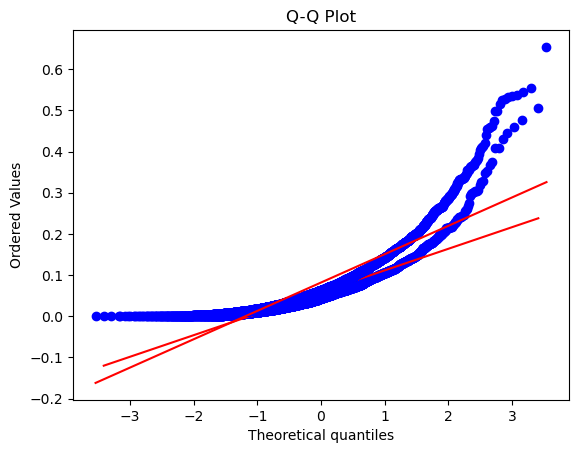

In [23]:
from scipy.stats import probplot

probplot(Mean_L4440_Vx_47_122s, plot=plt)
probplot(Mean_cyk1_Vx_47_122s, plot=plt)

plt.title("Q-Q Plot")
plt.show()

In [24]:
from scipy.stats import mannwhitneyu

# Assuming you have two datasets: data1 and data2
statistic, p_value = mannwhitneyu(Mean_L4440_Vx_47_122s,Mean_cyk1_Vx_47_122s)

print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("No significant difference in means (fail to reject H0)")
else:
    print("There is a significant difference in means (reject H0)")

Mann-Whitney U Statistic: 2969595.0
P-value: 6.797215494186051e-36
There is a significant difference in means (reject H0)


# Vy for control and cyk1 RNAi:

Vy of control embryos:

In [25]:
Final_Vy_L4440=[]
for i in range(len(Time_All)):
    Final_Vy_L4440.append([])
     
datasets_= [L4440_01,L4440_02,L4440_03,L4440_04,L4440_05,L4440_06,L4440_07,L4440_08,L4440_09,L4440_10,L4440_11,L4440_12,L4440_13,L4440_14,L4440_15]

count=0

for i in Time_All:
    for j in datasets_:
        for k in range(len(j.iloc[:,0])):
            if j.iloc[k,0]==i:
                Final_Vy_L4440[count].append(j.iloc[k,2])
    count+=1
print(Final_Vy_L4440)    

[[0.006054862352242907, 0.05173496435954803, 0.02840294437518338, 0.034274790318308136], [0.030205106786269198, 0.02180108042099178, 0.05190888650742522, 0.003994146926297048], [0.012651893889707822, 0.0018786446109857024, 0.0480634705742645, 0.059632664482313656, 0.042710510868118945], [0.04119490611187473, 0.029674073295475268, 0.04612985625750454, 0.043339239106665414, 0.028952533440355664, 0.1228818357083398, 0.01820196926095008], [0.023215252637149318, 0.01666227313042228, 0.03725437632819606, 0.030059337792100394, 0.06822119683755119, 0.07719961665532508, 0.032335362449100555, 0.06384585525562655, 0.024824166373369393, 0.012633212558425555, 0.012386960880193244], [0.020691332487274394, 6.272146420727154e-05, 0.03371010668865182, 0.05476440075555615, 0.02958406568113574, 0.0014110654172370118, 0.012273058247088641, 0.04649350019648253, 0.004780075580278975, 0.0014623021125757419, 0.0018815683030176445], [0.01602858709479236, 0.005166857773869537, 0.03373149530977102, 0.03200888596

In [26]:
Final_avg_Vy_L4440=[]
Final_std_dev_Vy_L4440=[]
for i in range(len(Time_All)):
    Final_avg_Vy_L4440.append(np.mean(Final_Vy_L4440[i]))
    Final_std_dev_Vy_L4440.append(np.std(Final_Vy_L4440[i]))
error_Pos=[]
error_neg=[]
for l in range(len(Final_avg_Vy_L4440)):
    error_Pos.append(Final_avg_Vy_L4440[l]+Final_std_dev_Vy_L4440[l])
    error_neg.append(Final_avg_Vy_L4440[l]-Final_std_dev_Vy_L4440[l])


(0.0, 200.0)

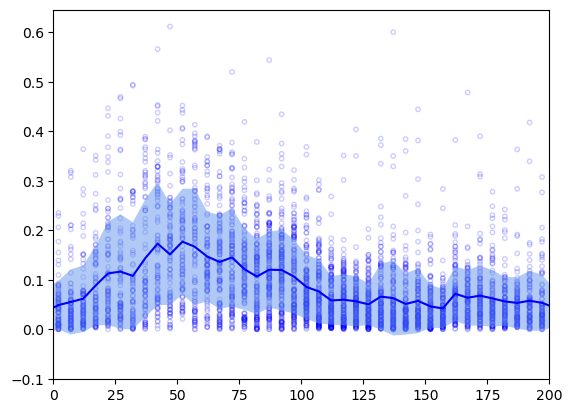

In [27]:
for i in range(len(Final_Vy_L4440)):
    plt.scatter([Time_All[i] for j in range(len(Final_Vy_L4440[i]))],Final_Vy_L4440[i],edgecolor='b',color='none',alpha=0.2,s=10)
#     plt.scatter([Time_All[i] for j in range(3)],np.percentile(Final_Vx_L4440[i],[25,50,90]),color='k')
plt.plot(Time_All,Final_avg_Vy_L4440,color='blue')

plt.fill_between(Time_All,error_Pos,error_neg,alpha=0.5, facecolor='cornflowerblue')
plt.xlim(0,200)


Vy of cyk-1 RNAi embryos:

In [28]:
Final_Vy_cyk1=[]
for i in range(len(Time_All_cyk1)):
    Final_Vy_cyk1.append([])
     
datasets_cyk1= [cyk1_01,cyk1_02,cyk1_03,cyk1_04,cyk1_05,cyk1_06,cyk1_07,cyk1_08,cyk1_09,cyk1_10,cyk1_11,cyk1_12,cyk1_13,cyk1_14]

count=0

for i in Time_All_cyk1:
    for j in datasets_cyk1:
#         print(count)
        for k in range(len(j.iloc[:,0])):
            if j.iloc[k,0]==i:
#                 print(count)
                Final_Vy_cyk1[count].append(j.iloc[k,2])
    count+=1
print(Final_Vy_cyk1)    

[[0.05610052556207847, 0.06727011121126729, 0.04397844407087988, 0.08840649431001069, 0.20800000000000018, 0.209735480582588, 0.08363355378199415], [0.11130287237156011, 0.05200000000000031, 0.02135860062884163, 0.0719783099883216, 0.00024225303080740445, 0.31200000000000044, 0.021766399792921477, 0.008796131611656932, 0.09677211793007316], [0.016240728895253298, 0.02101871467117178, 0.026002951859639724, 0.024709978955885604, 0.03933691231129899, 0.03137557178486361, 0.02514683639343467, 0.04907433906219829, 0.020961328407661028, 0.06997407382472112, 0.07514635683195792, 0.03279093687424819, 0.04356609037690333], [0.01170368032869149, 0.05512984401017533, 0.05764907695144643, 0.09862442821513681, 0.08003377374117945, 0.04936164244164516, 0.03554600172378031, 0.05330301709803322, 0.0484762283426484, 0.11673931688933763, 0.00166392725689537, 0.013661081042397428, 0.019455161464378888], [0.004011705508466435, 0.052503937097176136, 0.14753282136105703, 0.049166466065891964, 0.013758016409

In [29]:
Final_avg_Vy_cyk1=[]
Final_std_dev_Vy_cyk1=[]
for i in range(len(Time_All_cyk1)):
    Final_avg_Vy_cyk1.append(np.mean(Final_Vy_cyk1[i]))
    Final_std_dev_Vy_cyk1.append(np.std(Final_Vy_cyk1[i]))
print(Final_avg_Vy_cyk1) 
error_Pos_cyk1=[]
error_neg_cyk1=[]
for l in range(len(Final_avg_Vx_cyk1)):
    error_Pos_cyk1.append(Final_avg_Vy_cyk1[l]+Final_std_dev_Vy_cyk1[l])
    error_neg_cyk1.append(Final_avg_Vy_cyk1[l]-Final_std_dev_Vy_cyk1[l])


[0.10816065850268838, 0.07735740948379813, 0.036564986173018274, 0.04933439842351891, 0.03537464173596333, 0.03763303832215863, 0.0309794170018362, 0.03232183778194217, 0.038022916030371605, 0.05855790934297031, 0.0761149759686732, 0.0653721461161042, 0.04830596884653774, 0.06836598155057096, 0.03438771779102024, 0.03189441398571791, 0.04704119220506127, 0.029407241371660786, 0.02247266698174829, 0.02648506134428931, 0.03609424668701598, 0.03823911332911101, 0.048053783291640256, 0.038778224032206425, 0.049626417028914106, 0.035873098088049116, 0.03419471641944901, 0.07681355441462097, 0.08357152399063596, 0.04397478486105001, 0.03691783360477843, 0.05208981027717152, 0.03648065483723597, 0.06085924964851444, 0.03585502630611398, 0.031333536471515405, 0.033422462130634684, 0.030700803754562467, 0.036489939991801855, 0.03199437218840059, 0.04569623699258667, 0.057200447498954005, 0.046729981342427514, 0.05185566765085815, 0.05642093115921461, 0.0806861842695373, 0.0796597539027879, 0.03

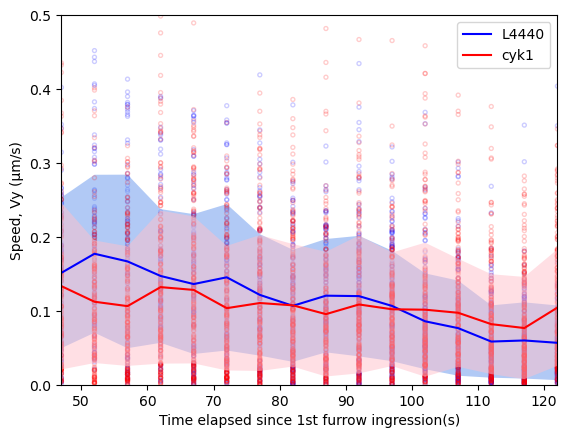

In [30]:
for i in range(len(Final_Vy_L4440)):
    plt.scatter([Time_All[i] for j in range(len(Final_Vy_L4440[i]))],Final_Vy_L4440[i],edgecolor='b',color='none',alpha=0.2,s=8)
#     plt.scatter([Time_All[i] for j in range(3)],np.percentile(Final_Vx_L4440[i],[25,50,90]),color='k')
plt.plot(Time_All,Final_avg_Vy_L4440,color='blue',label='L4440')

plt.fill_between(Time_All,error_Pos,error_neg,alpha=0.5, facecolor='cornflowerblue')



for m in range(len(Final_Vy_cyk1)):
    plt.scatter([Time_All_cyk1[m] for j in range(len(Final_Vy_cyk1[m]))],Final_Vy_cyk1[m],edgecolor='r',color='none',alpha=0.2,s=8)
plt.plot(Time_All_cyk1,Final_avg_Vy_cyk1,color='red',label='cyk1')

plt.fill_between(Time_All_cyk1,error_Pos_cyk1,error_neg_cyk1,alpha=0.5, facecolor='pink')
plt.xlim(47,122)
plt.xlabel('Time elapsed since 1st furrow ingression(s)')
plt.ylabel('Speed, Vy (\u03bcm/s)')
plt.ylim(0,0.5)
plt.legend()
plt.savefig('Vy_L4440_cyk1.jpg')

# Histogram of Vy from 47s t0 122s for control and cyk-1 RNAi:


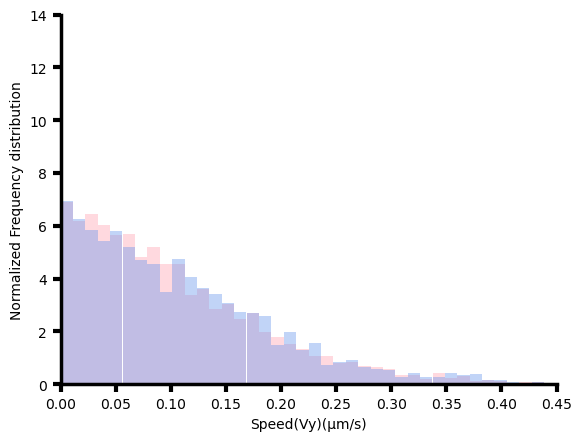

Mean Vy L4440: 0.10842882725362832    std. dev. L4440: 0.08700308709056702
Median Vy L4440: 0.0890597990091436
Mean Vy cyk1: 0.10537783594519759    std. dev. cyk1: 0.08713439169447587
Median Vy cyk1: 0.08480560863527664


In [31]:
Mean_cyk1_Vy_47_122s=[]
Mean_L4440_Vy_47_122s=[]
for i in range(index_start_cyk1,(index_end_cyk1+1),1):#here the last index is increased by 1 as in range of index value, it will leave the last number
    for j in range(len(Final_Vy_cyk1[i])):
        Mean_cyk1_Vy_47_122s.append(Final_Vy_cyk1[i][j])
for l in range(index_start_L4440,(index_end_L4440+1),1):        
    for k in range(len(Final_Vy_L4440[l])):
#         print(k)
        Mean_L4440_Vy_47_122s.append(Final_Vy_L4440[l][k])
# print(Mean_speed_95_205s)    
# print(np.mean(Mean_speed_95_205s),np.)
plt.hist(Mean_cyk1_Vy_47_122s,range=(0,0.45),bins=40,align='mid',density=True,alpha=0.6,label='cyk1',color='pink')
plt.hist(Mean_L4440_Vy_47_122s,range=(0,0.45),bins=40,align='mid',density=True,alpha=0.4,label='L4440',color='cornflowerblue')
# plt.legend()
plt.tick_params(axis='x',labelbottom=False,width=3,length=6)    #use this
plt.tick_params(axis='y',labelleft=False,width=3,length=6)       #use this
# plt.tick_params(axis='x',width=3,length=6)  #use this to only increase thickness of axes.
# plt.tick_params(axis='y',width=3,length=6)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
plt.xlabel('Speed(Vy)(\u03bcm/s)')    #use this
plt.ylabel('Normalized Frequency distribution')               #use this
# plt.gca().xaxis.set_ticklabels([])    #use this
# plt.gca().yaxis.set_ticklabels([])     #use this
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.ylim(0,14)
plt.xlim(0,0.45)
plt.savefig('Vy_Histogram_47_122s_L4440_cyk1.tif',dpi=1200)
plt.show()

print("Mean Vy L4440:",np.mean(Mean_L4440_Vy_47_122s),"  ","std. dev. L4440:",np.std(Mean_L4440_Vy_47_122s))
print("Median Vy L4440:",np.median(Mean_L4440_Vy_47_122s))
print("Mean Vy cyk1:",np.mean(Mean_cyk1_Vy_47_122s),"  ","std. dev. cyk1:",np.std(Mean_cyk1_Vy_47_122s))
print("Median Vy cyk1:",np.median(Mean_cyk1_Vy_47_122s))

In [32]:
# WHEN PLOTTING ABOVE HISTOGRAM IN PRISM THEN USE THIS CODE

import pandas as pd
import numpy as np

# Histogram parameters (same as your plot)
bins = 40
hist_range = (0, 0.45)

# L4440 histogram
hist_L4440, bin_edges = np.histogram(
    Mean_L4440_Vy_47_122s,
    bins=bins,
    range=hist_range,
    density=True
)

# cyk1 histogram
hist_cyk1, _ = np.histogram(
    Mean_cyk1_Vy_47_122s,
    bins=bins,
    range=hist_range,
    density=True
)

# Bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create DataFrame
hist_df = pd.DataFrame({
    'Bin_center_Vy (µm/s)': bin_centers,
    'L4440_Normalized_Frequency': hist_L4440,
    'cyk1_Normalized_Frequency': hist_cyk1
})

# Save to CSV
hist_df.to_csv(
    'To_plot_in_prism_Vy_Normalized_Histogram_47_122s_L4440_cyk1.csv',
    index=False
)


In [33]:
# WHEN STATISTICS IS NEEDED TO BE DONE OF ABOVE HISTOGRAM IN PRISM THEN USE THIS CODE

# Convert to pandas Series (different lengths are fine)
raw_df = pd.DataFrame({
    'L4440_Vy (µm/s)': pd.Series(Mean_L4440_Vy_47_122s),
    'cyk1_Vy (µm/s)': pd.Series(Mean_cyk1_Vy_47_122s)
})

# Save raw velocity values
raw_df.to_csv(
    'UL_Vy_Raw_Values_47_122s_L4440_cyk1.csv',
    index=False
)


In [34]:
from scipy.stats import mannwhitneyu

# Assuming you have two datasets: data1 and data2
statistic, p_value = mannwhitneyu(Mean_L4440_Vy_47_122s,Mean_cyk1_Vy_47_122s)

print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("No significant difference in means (fail to reject H0)")
else:
    print("There is a significant difference in means (reject H0)")

Mann-Whitney U Statistic: 3792675.5
P-value: 0.1371639936680506
No significant difference in means (fail to reject H0)
